In [15]:
! pip install kaggle

In [16]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:19<00:00, 181MB/s]
100% 2.70G/2.70G [00:19<00:00, 149MB/s]


In [6]:
!unzip /content/new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

(256, 256, 3)


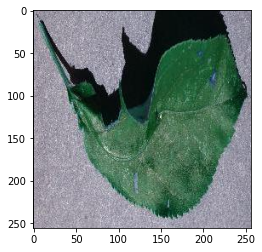

In [17]:
import cv2,matplotlib.pyplot as plt
img=cv2.imread('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727_270deg.JPG')
plt.imshow(img)
print(img.shape)

In [18]:
batch_size = 128
img_height = 256
img_width = 256

In [19]:
import tensorflow as tf
import keras
train_data_dir='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 70295 files belonging to 38 classes.
Using 56236 files for training.


In [20]:
validation_data_dir='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
validation_ds=tf.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir,
    subset='validation',
    validation_split=0.2,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 17572 files belonging to 38 classes.
Using 3514 files for validation.


In [21]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

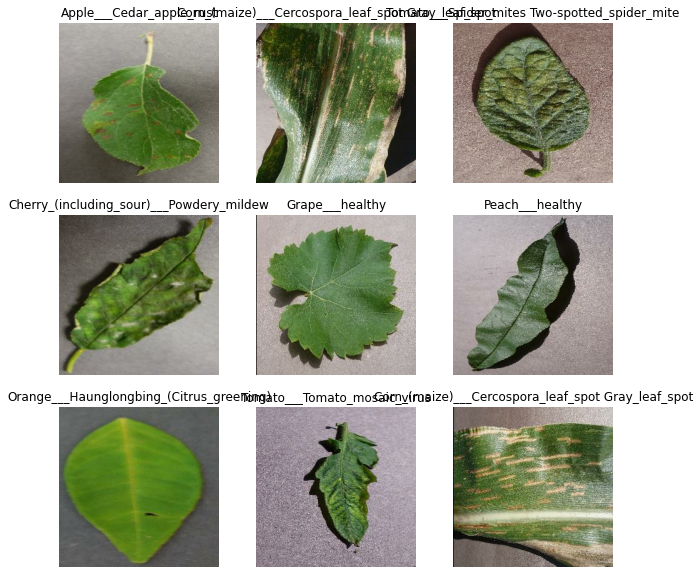

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [23]:
'''AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)'''

'AUTOTUNE = tf.data.AUTOTUNE\n\ntrain_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)\nvalidation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)'

In [24]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 256, 256, 3)
(128,)


In [27]:
num_classes = 38
inputs=(256,256,3)
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=inputs),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes,activation='softmax')
])

In [28]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 64)       

In [29]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint('Blight_Classification.hdf5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
callbacks = [checkpoint]
epochs=10
model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs,
  callbacks=callbacks
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


440/440 [==============================] - 70s 154ms/step - loss: 1.5315 - accuracy: 0.5591 - val_loss: 0.7306 - val_accuracy: 0.7738

Epoch 00001: val_loss improved from inf to 0.73059, saving model to Blight_Classification.hdf5
Epoch 2/10
440/440 [==============================] - 66s 148ms/step - loss: 0.5323 - accuracy: 0.8341 - val_loss: 0.3942 - val_accuracy: 0.8782

Epoch 00002: val_loss improved from 0.73059 to 0.39419, saving model to Blight_Classification.hdf5
Epoch 3/10
440/440 [==============================] - 66s 148ms/step - loss: 0.3329 - accuracy: 0.8951 - val_loss: 0.3167 - val_accuracy: 0.8998

Epoch 00003: val_loss improved from 0.39419 to 0.31673, saving model to Blight_Classification.hdf5
Epoch 4/10
440/440 [==============================] - 65s 147ms/step - loss: 0.2245 - accuracy: 0.9264 - val_loss: 0.2777 - val_accuracy: 0.9112

Epoch 00004: val_loss improved from 0.31673 to 0.27767, saving model to Blight_Classification.hdf5
Epoch 5/10
440/440 [===============

In [48]:
import numpy as np
img=cv2.imread('/content/test/test/CornCommonRust3.JPG')
_scale = lambda dim, s: int(dim * s / 100)
im: np.ndarray = cv2.imread('/content/test/test/CornCommonRust3.JPG')
width, height, channels = im.shape
scale_1=(100*256)/width
scale_2=(100*256)/height
print("{},{},{}".format(width,height,channels))
new_width: int = _scale(width, scale_1)
new_height: int = _scale(height, scale_2)
new_dim: tuple = (new_width, new_height)
image=cv2.resize(src=im, dsize=new_dim, interpolation=cv2.INTER_LINEAR)
image = image.reshape((256,256,3))  # RESHAPING
X = np.zeros((1,256,256, 3), dtype=np.float32)
X[0]=image
model.predict(X)

256,256,3


array([[1.5951124e-10, 6.7132099e-08, 5.2798550e-18, 1.6340074e-07,
        3.2729933e-15, 2.4257785e-14, 2.8119137e-14, 7.8727574e-10,
        7.2988856e-01, 1.5143840e-18, 2.7009925e-01, 5.0176148e-23,
        1.1662869e-16, 2.2367414e-17, 2.5380102e-20, 1.4656976e-12,
        1.4185436e-14, 4.3154817e-16, 2.4859854e-15, 3.0351269e-13,
        1.3782229e-15, 3.2814421e-24, 5.6682767e-13, 1.2268200e-19,
        2.2304108e-17, 4.8233591e-08, 4.1830391e-18, 1.4681243e-22,
        2.1308712e-18, 3.5787121e-08, 1.1828604e-05, 1.3008958e-20,
        3.6853480e-15, 5.9508871e-23, 2.0441566e-14, 2.1625433e-13,
        4.8992320e-23, 2.7856243e-17]], dtype=float32)

In [49]:
np.where(model.predict(X)== np.amax(model.predict(X)))

(array([0]), array([8]))

In [52]:
import numpy as np
img=cv2.imread('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_/RS_Rust 1566.JPG')
_scale = lambda dim, s: int(dim * s / 100)
im: np.ndarray = cv2.imread('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_/RS_Rust 1566.JPG')
width, height, channels = im.shape
scale_1=(100*256)/width
scale_2=(100*256)/height
print("{},{},{}".format(width,height,channels))
new_width: int = _scale(width, scale_1)
new_height: int = _scale(height, scale_2)
new_dim: tuple = (new_width, new_height)
image=cv2.resize(src=im, dsize=new_dim, interpolation=cv2.INTER_LINEAR)
image = image.reshape((256,256,3))  # RESHAPING
X = np.zeros((1,256,256, 3), dtype=np.float32)
X[0]=image
model.predict(X)

256,256,3


array([[3.53320842e-16, 2.86400053e-11, 7.32755497e-15, 1.24791635e-08,
        8.04824279e-21, 1.23780272e-13, 1.42622408e-14, 1.78843579e-10,
        9.99908328e-01, 1.69545175e-17, 9.16024219e-05, 1.14789738e-22,
        5.33990580e-17, 3.64554537e-16, 8.42317178e-20, 5.80077014e-17,
        1.17478328e-14, 3.95943276e-18, 5.09649840e-18, 2.24801742e-08,
        6.44517127e-14, 2.06048045e-21, 7.53275860e-13, 1.06538290e-17,
        1.41716925e-11, 1.82808629e-11, 1.87321879e-16, 2.23526129e-25,
        6.00620210e-16, 7.79455500e-10, 6.75387142e-08, 1.26541561e-16,
        1.27319784e-14, 2.89760601e-22, 4.69536996e-12, 2.40014780e-22,
        1.64859481e-23, 7.16019176e-14]], dtype=float32)

In [53]:
np.where(model.predict(X)== np.amax(model.predict(X)))

(array([0]), array([8]))

In [54]:
from keras.models import load_model
import numpy as np
model_n = load_model('/content/Blight_Classification.hdf5')
img=cv2.imread('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_/RS_Rust 1566.JPG')
_scale = lambda dim, s: int(dim * s / 100)
im: np.ndarray = cv2.imread('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_/RS_Rust 1566.JPG')
width, height, channels = im.shape
scale_1=(100*256)/width
scale_2=(100*256)/height
print("{},{},{}".format(width,height,channels))
new_width: int = _scale(width, scale_1)
new_height: int = _scale(height, scale_2)
new_dim: tuple = (new_width, new_height)
image=cv2.resize(src=im, dsize=new_dim, interpolation=cv2.INTER_LINEAR)
image = image.reshape((256,256,3))  # RESHAPING
X = np.zeros((1,256,256, 3), dtype=np.float32)
X[0]=image
model_n.predict(X)

256,256,3


array([[8.1681701e-09, 6.8848030e-06, 3.6812103e-10, 1.6398637e-07,
        2.8569518e-17, 9.6245583e-07, 7.9649165e-10, 5.5221218e-08,
        9.9882692e-01, 6.8573645e-18, 1.0820548e-03, 1.8184570e-17,
        1.5375707e-15, 3.2247312e-12, 2.1539341e-17, 7.4224165e-18,
        2.8792337e-09, 4.4290318e-12, 1.4574318e-15, 6.3324387e-07,
        2.1366884e-12, 6.7720133e-20, 3.6471468e-10, 1.7479277e-15,
        7.2404145e-11, 2.9884491e-11, 3.2788867e-17, 1.0780634e-22,
        2.4853454e-14, 5.1642842e-06, 7.7069933e-05, 1.0162252e-12,
        8.9182280e-13, 4.2414286e-18, 1.1717426e-08, 4.9244572e-20,
        1.8650755e-19, 3.3964389e-12]], dtype=float32)

In [55]:
np.where(model.predict(X)== np.amax(model.predict(X)))

(array([0]), array([8]))

In [56]:
from keras.models import load_model
import numpy as np
model_n = load_model('/content/Blight_Classification.hdf5')
img=cv2.imread('/content/test/test/CornCommonRust3.JPG')
_scale = lambda dim, s: int(dim * s / 100)
im: np.ndarray = cv2.imread('/content/test/test/CornCommonRust3.JPG')
width, height, channels = im.shape
scale_1=(100*256)/width
scale_2=(100*256)/height
print("{},{},{}".format(width,height,channels))
new_width: int = _scale(width, scale_1)
new_height: int = _scale(height, scale_2)
new_dim: tuple = (new_width, new_height)
image=cv2.resize(src=im, dsize=new_dim, interpolation=cv2.INTER_LINEAR)
image = image.reshape((256,256,3))  # RESHAPING
X = np.zeros((1,256,256, 3), dtype=np.float32)
X[0]=image
model_n.predict(X)

256,256,3


array([[4.3257300e-09, 1.0552631e-06, 7.6051414e-16, 3.0701572e-10,
        7.0504882e-20, 2.2968277e-15, 4.2260414e-16, 3.2380240e-13,
        9.7760779e-01, 3.4782412e-21, 1.0448775e-02, 1.0870593e-19,
        6.8018421e-19, 4.8401580e-15, 4.0896154e-25, 1.6713647e-19,
        3.5881379e-18, 1.4291320e-17, 2.6774563e-17, 1.5556811e-10,
        7.7744142e-18, 2.4694981e-24, 8.1995080e-14, 3.5260071e-25,
        2.4545663e-23, 4.7154511e-13, 3.8081453e-26, 2.0211225e-29,
        4.1020407e-23, 6.5660949e-11, 1.1942461e-02, 1.8546556e-24,
        3.1889793e-20, 9.1620590e-28, 1.3474355e-16, 4.5581846e-20,
        1.2359944e-25, 5.4236016e-20]], dtype=float32)

In [57]:
np.where(model.predict(X)== np.amax(model.predict(X)))

(array([0]), array([8]))